## Plots

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

PHYSICAL_CORES=64

def plot(p_data, p_yId, p_xId, p_hueId, p_styleId, p_logScale=False, p_smt_marker=False, p_export_filename=None, p_xLabel=None, p_yLabel=None):
    rcParams['figure.figsize'] = 12,8
    rcParams['font.size'] = 12
    rcParams['svg.fonttype'] = 'none'
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        hue=p_hueId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    
    
    if p_xLabel != None:
        plot.set(xlabel=p_xLabel)
    else:
        plot.set(xlabel=p_xId)

    if p_yLabel != None:
        plot.set(ylabel=p_yLabel)
    else:
        plot.set(ylabel=p_yId)


    plt.grid(color='gainsboro')
    plt.grid(True,which='minor', linestyle='--', linewidth=0.5, color='gainsboro') 

    if(p_smt_marker == True):
        plt.axvline(PHYSICAL_CORES, linestyle='--', color='red', label='using SMT')

    plt.legend()

    if(p_export_filename != None):
        plt.savefig(p_export_filename)

    plt.show()

### Gauss3

#### Efficiency by threads

/var/folders/zt/h71khkbd7ll9krscx1zncwlc0000gn/T/ipykernel_20324/181008364.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ref_runtime = data_frame_copy[data_frame.impl_id == '\Verb{cg_nonconst_coeff_precalc}'][data_frame.threads == 1]['runtime'].values[0]


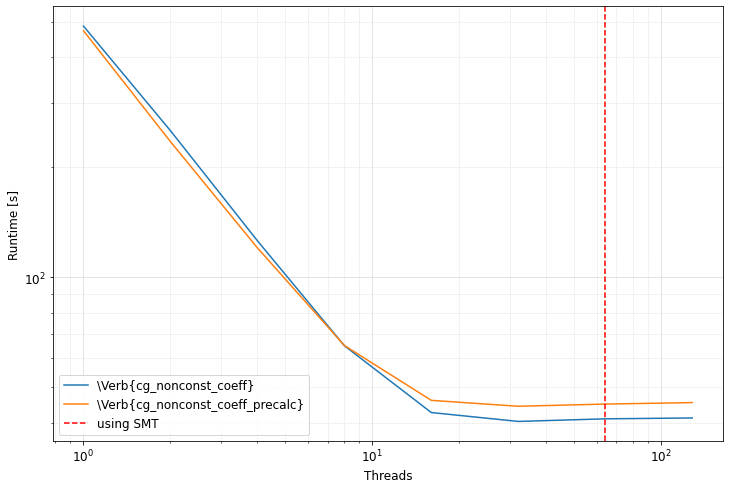

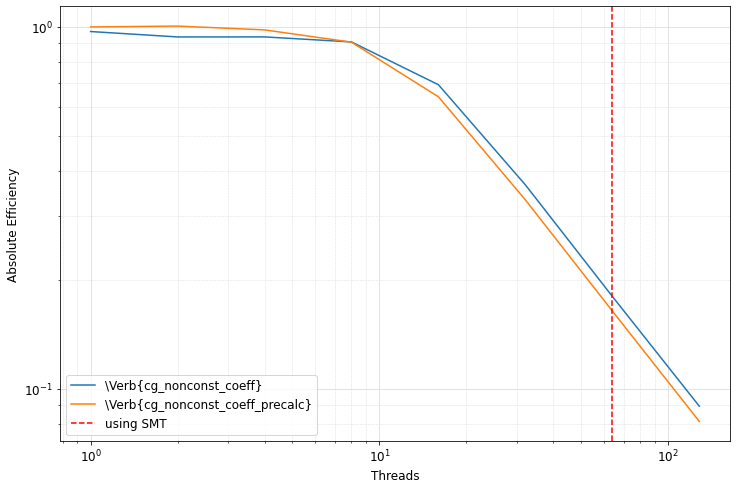

In [10]:
import pandas as pd
import seaborn as sns

# sns.set_theme()
# sns.set_style("ticks")

data_frame = pd.read_csv('./e_efficiency_by_threads.csv')
data_frame = data_frame[data_frame.region_id == 'apply']
data_frame['efficiency_type'] = 'relative'

#
# NOTE: calc absolute efficiency
#
data_frame_copy = data_frame.copy()
data_frame_copy['efficiency_type'] = 'absolute'
ref_runtime = data_frame_copy[data_frame.impl_id == '\Verb{cg_nonconst_coeff_precalc}'][data_frame.threads == 1]['runtime'].values[0]
data_frame_copy['efficiency']=data_frame_copy.apply(lambda row: ref_runtime/(row['runtime'] * row['threads']), axis=1)

data_frame = data_frame_copy.append(data_frame)
data_frame = data_frame[data_frame.efficiency_type == 'absolute']

# display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True,
    p_export_filename='runtime.svg',
    p_xLabel="Threads",
    p_yLabel="Runtime [s]")
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True,
    p_export_filename='efficiency.svg',
    p_xLabel="Threads",
    p_yLabel="Absolute Efficiency")
# plot(p_data=data_frame,
#     p_yId='iter',
#     p_xId='threads',
#     p_hueId='impl_id',
#     p_styleId=None,
#     p_logScale=False,
#     p_core_marker=True)